In [14]:
import rebound as rb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pars = [{'m':1},{'m':1,'a':1}]

In [2]:
def isoForce(sim):
    sim.calculate_orbits()
    ps = sim.particles
    mdot = 1e-5
    mtot = ps[0].m + ps[1].m
    eps = -dt*mdot/mtot
    fac_a = ps[1].a * (1 + ps[1].e**2 + 2*ps[1].e*np.cos(ps[1].f))/(1 - ps[1].e**2)
    fac_e = (ps[1].e + np.cos(ps[1].f))
    ps[1].a += eps * fac_a
    ps[1].e += eps * fac_e
    

In [18]:
sim = rb.Simulation()
for p in pars:
    sim.add(**p)
sim.move_to_com()

In [22]:
sim.additional_forces = isoForce
sim.force_is_velocity_dependent = True

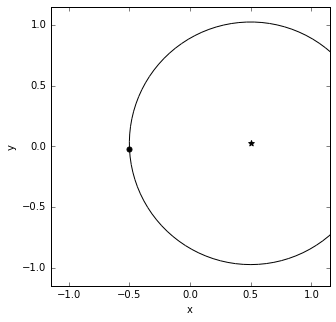

In [23]:
sim.move_to_com()
rb.OrbitPlot(sim);